(basic_output_ex)=
# Basic Output Example

Imagine we want to explore the function `scipy.special.eval_jacobi`. It takes four different arguments and we want to get a feel for what each does.

First we wrap it in a `Runner` object, that encapsulates how to run all the different combinations of its arguments and automatically labels the output.

In [1]:
%config InlineBackend.figure_formats = ['svg']
from scipy.special import eval_jacobi

import xyzpy as xyz


def jacobi(x, n, alpha, beta):
    return eval_jacobi(n, alpha, beta, x)


r = xyz.Runner(jacobi, var_names="Pn(x)")

This is as simple as it gets, the function ``jacobi`` has one output variable, which we are calling ``'Pn(x)'``.

Now let's define all the different values we want to try for each argument (the function actually vectorizes over ``x`` so this is overkill, but serves as a good demonstration):

In [2]:
import numpy as np

combos = {
    "x": np.linspace(0, 1, 101),
    "n": [1, 2, 4, 8, 16],
    "alpha": np.linspace(0, 2, 3),
    "beta": np.linspace(0, 1, 5),
}

Now, let’s run the function for every combination of the above parameters:

In [3]:
r.run_combos(combos)

100%|##########| 7575/7575 [00:00<00:00, 566818.06it/s]


<xarray.Dataset>
Dimensions:  (x: 101, n: 5, alpha: 3, beta: 5)
Coordinates:
  * x        (x) float64 0.0 0.01 0.02 0.03 0.04 ... 0.96 0.97 0.98 0.99 1.0
  * n        (n) int64 1 2 4 8 16
  * alpha    (alpha) float64 0.0 1.0 2.0
  * beta     (beta) float64 0.0 0.25 0.5 0.75 1.0
Data variables:
    Pn(x)    (x, n, alpha, beta) float64 0.0 -0.125 -0.25 ... 153.0 153.0 153.0

The resulting dataset is stored in ``r.last_ds`` and is an automatically labelled n-dimensional `xarray.Dataset`. Let's interactively plot what we have, showing the effect of all four dimensions:

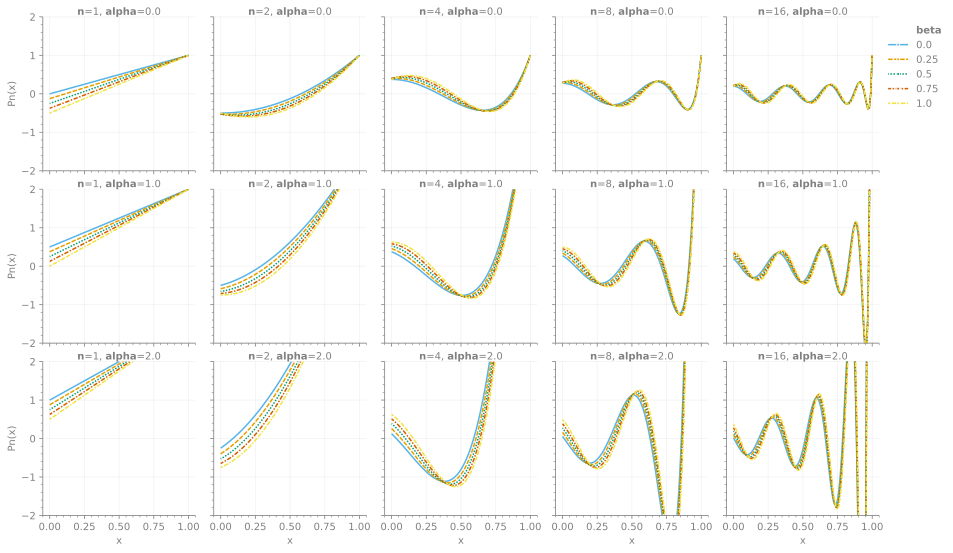

In [4]:
fig, axs = r.last_ds.xyz.plot(
    x="x",
    y="Pn(x)",
    color="beta",
    linestyle="beta",
    col="n",
    row="alpha",
    marker="",
    ylim=(-2, 2),
)